<a href="https://colab.research.google.com/github/betr0dalf/PZMS/blob/main/PZMS_NovikovDV_prac1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Прикладные задачи математической статистики
# Практическая работа № 1
# Выполнил студент группы ИНБО-05-22
# Новиков Денис Владиславович

   Рост, cm  М.Р  Число (от 0 до 8)
0     173.0    4                  4
1     187.0    2                  1
2     183.0    6                  4
3     173.0    6                  0
4     169.0    9                  1
                   Абсолютная частота  Относительная частота
Число (от 0 до 8)                                           
0                                   2               0.071429
1                                   4               0.142857
2                                   1               0.035714
3                                   4               0.142857
4                                   4               0.142857
5                                   4               0.142857
6                                   4               0.142857
7                                   3               0.107143
8                                   2               0.071429


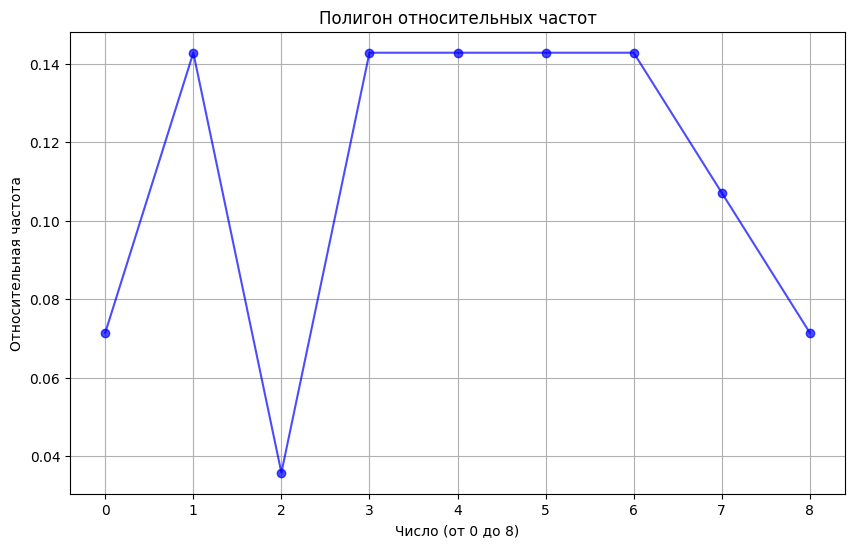

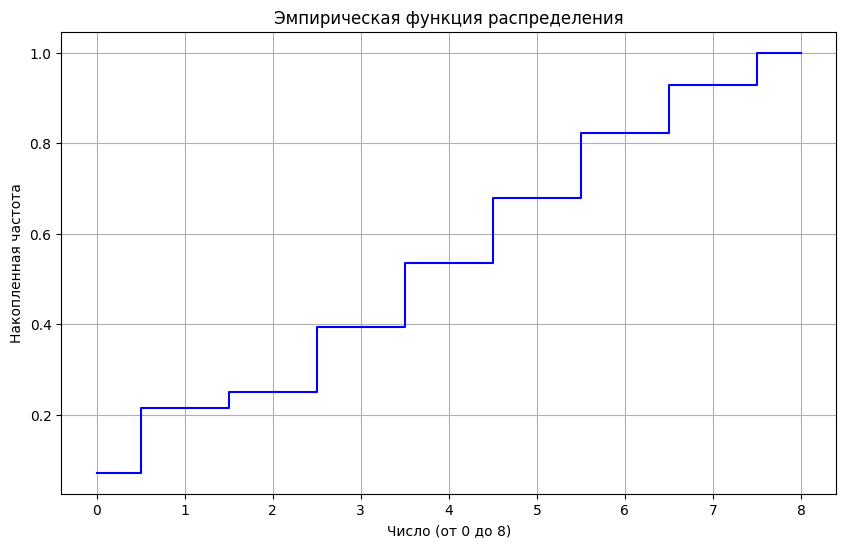

Эмпирическая функция распределения:
 Число (от 0 до 8)
0    0.071429
1    0.214286
2    0.250000
3    0.392857
4    0.535714
5    0.678571
6    0.821429
7    0.928571
8    1.000000
Name: Накопленная частота, dtype: float64
Выборочное среднее: 4.107142857142857
Выборочная дисперсия: 5.7288359788359795
Выборочное стандартное отклонение: 2.393498689959111
Выборочная медиана: 4.0
Коэффициент вариации: 58.276489842482704%
Число групп (интервалов) по правилу Стёрджесса: 6
Границы интервалов: [160.66666667 165.33333333 170.         174.66666667 179.33333333
 184.         188.66666667 193.33333333]
                    Абсолютная частота  Относительная частота
Рост, cm                                                     
[160.667, 165.333)                   3               0.107143
[165.333, 170.0)                     2               0.071429
[170.0, 174.667)                     8               0.285714
[174.667, 179.333)                   2               0.071429
[179.333, 184.0)              

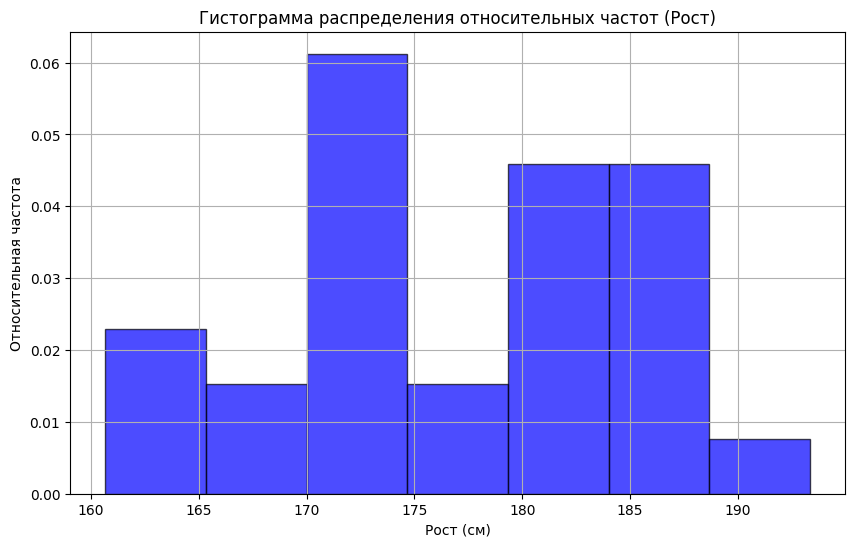

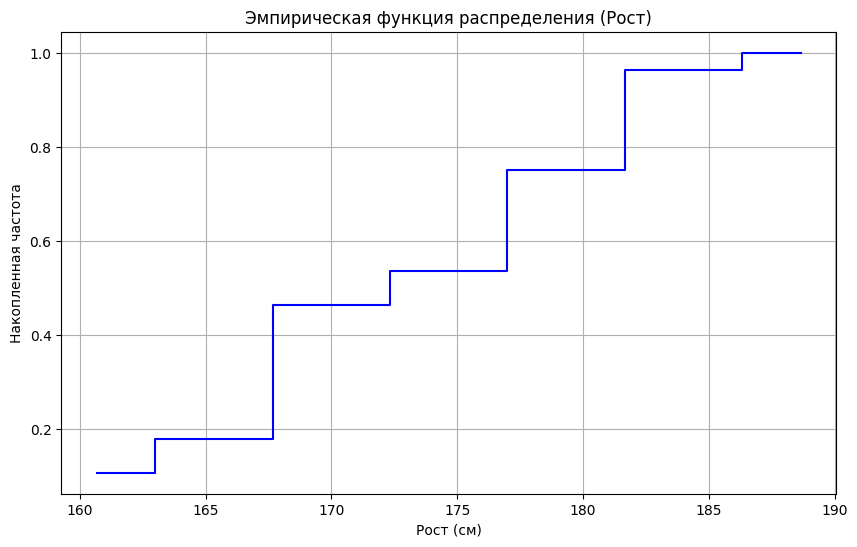

Рост, cm
[160.667, 165.333)    0.107143
[165.333, 170.0)      0.178571
[170.0, 174.667)      0.464286
[174.667, 179.333)    0.535714
[179.333, 184.0)      0.750000
[184.0, 188.667)      0.964286
[188.667, 193.333)    1.000000
Name: Накопленная частота, dtype: float64
Выборочное среднее: 176.79999999999998
Выборочная дисперсия: 61.07185185185186
Выборочное стандартное отклонение: 7.8148481656300826
Выборочная медиана: 176.5
Коэффициент вариации: 4.420162989609776%


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import statistics
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

# Загрузка данных
data_pr1 = pd.read_excel('pr1.xlsx')
print(data_pr1.head())

discrete_data = data_pr1['Число (от 0 до 8)']

# Построить вариационный ряд с абсолютными и относительными
# частотами по выборке дискретных данных

# Подсчет абсолютных частот
absolute_freq = discrete_data.value_counts().sort_index()

# Подсчет относительных частот
relative_freq = absolute_freq / len(discrete_data)

# Построение DataFrame с абсолютными и относительными частотами
variation_series = pd.DataFrame({
    'Абсолютная частота': absolute_freq,
    'Относительная частота': relative_freq
})

# Отображение вариационного ряда
print(variation_series)

# Построить полигон относительных частот вариационного ряда

plt.figure(figsize=(10, 6))
plt.plot(variation_series.index, variation_series['Относительная частота'], marker='o', color='blue', linestyle='-', alpha=0.7)
plt.title('Полигон относительных частот')
plt.xlabel('Число (от 0 до 8)')
plt.ylabel('Относительная частота')
plt.grid(True)
plt.show()

# Выписать выражение для эмпирической функции распределения
# и построить её график

# Рассчет эмпирической функции распределения (накопленные относительные частоты)
variation_series['Накопленная частота'] = variation_series['Относительная частота'].cumsum()

# Построение графика эмпирической функции распределения
plt.figure(figsize=(10, 6))
plt.step(variation_series.index, variation_series['Накопленная частота'], where='mid', color='blue')
plt.title('Эмпирическая функция распределения')
plt.xlabel('Число (от 0 до 8)')
plt.ylabel('Накопленная частота')
plt.grid(True)
plt.show()

# Выражение для ЭФР можно записать как:
print(f"Эмпирическая функция распределения:\n {variation_series['Накопленная частота']}")

# Рассчитать выборочные описательные статистики:

# Выборочное среднее
sample_mean = discrete_data.mean()
print(f"Выборочное среднее: {sample_mean}")

# Выборочная дисперсия
sample_variance = discrete_data.var()
print(f"Выборочная дисперсия: {sample_variance}")

# Выборочное стандартное отклонение
sample_std = discrete_data.std()
print(f"Выборочное стандартное отклонение: {sample_std}")

# Выборочная медиана
sample_median = discrete_data.median()
print(f"Выборочная медиана: {sample_median}")

# Коэффициент вариации
coefficient_of_variation = (sample_std / sample_mean) * 100
print(f"Коэффициент вариации: {coefficient_of_variation}%")

# Рассчитать число групп (интервалов) m для квантования исходных
# данных по правилу Стёрджесса

# Размер выборки для роста
n = len(data_pr1['Рост, cm'])

# Число групп по правилу Стёрджесса
m = round(1 + 3.322 * np.log10(n))
print(f"Число групп (интервалов) по правилу Стёрджесса: {m}")

# Вычислить значения m+1 границ групп для значений выборки по
# правилу фиксированной величины интервала

# Минимальное и максимальное значение роста
min_height = data_pr1['Рост, cm'].min()
max_height = data_pr1['Рост, cm'].max()

# Шаг интервала
interval_size = (max_height - min_height) / m

# Границы интервалов начиная с min - h/2
start = min_height - interval_size / 2
end = max_height + interval_size / 2

# Вычисляем границы интервалов
intervals = np.arange(start, end, interval_size)

print(f"Границы интервалов: {intervals}")

# Построить вариационный ряд для выборки интервальных данных

# Распределение по интервалам и подсчет частот
interval_counts = pd.cut(data_pr1['Рост, cm'], bins=intervals, right=False).value_counts().sort_index()

# Относительные частоты
relative_frequencies = interval_counts / len(data_pr1)

# Построение вариационного ряда
interval_variation_series = pd.DataFrame({
    'Абсолютная частота': interval_counts,
    'Относительная частота': relative_frequencies
})
print(interval_variation_series)

# Построить гистограмму распределения относительных частот для
# рассчитанных интервалов выборки

# Гистограмма относительных частот
plt.figure(figsize=(10, 6))
plt.hist(data_pr1['Рост, cm'], bins=intervals, density=True, alpha=0.7, color='blue', edgecolor='black')
plt.title('Гистограмма распределения относительных частот (Рост)')
plt.xlabel('Рост (см)')
plt.ylabel('Относительная частота')

plt.grid(True)
plt.show()

# Выписать выражение для эмпирической функции распределения,
# построить её график

# Накопленная частота для эмпирической функции распределения
interval_variation_series['Накопленная частота'] = interval_variation_series['Относительная частота'].cumsum()

# Построение графика ЭФР
plt.figure(figsize=(10, 6))
plt.step(intervals[:-1], interval_variation_series['Накопленная частота'], where='mid', color='blue')
plt.title('Эмпирическая функция распределения (Рост)')
plt.xlabel('Рост (см)')
plt.ylabel('Накопленная частота')
plt.grid(True)
plt.show()

# Выражение для ЭФР
print(interval_variation_series['Накопленная частота'])

# Рассчитать выборочные описательные статистики

# Выборочное среднее
sample_mean = data_pr1['Рост, cm'].mean()
print(f"Выборочное среднее: {sample_mean}")

# Выборочная дисперсия
sample_variance = data_pr1['Рост, cm'].var()
print(f"Выборочная дисперсия: {sample_variance}")

# Выборочное стандартное отклонение
sample_std = data_pr1['Рост, cm'].std()
print(f"Выборочное стандартное отклонение: {sample_std}")

# Выборочная медиана
sample_median = data_pr1['Рост, cm'].median()
print(f"Выборочная медиана: {sample_median}")

# Коэффициент вариации
coefficient_of_variation = (sample_std / sample_mean) * 100
print(f"Коэффициент вариации: {coefficient_of_variation}%")
